This project uses the Credit Card Fraud Detection Dataset 2023 which contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Key Features:

id : Unique identifier for each transaction

V1-V28 : Anonymized features representing various transaction attributes (e.g., time, location, etc.)

Amount : The transaction amount

Class : Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [1]:
import pandas as pd
import numpy as np

#Statistics / Logistic Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

Load Dataset & Get Overview of the Data

In [27]:
credit_original_data = pd.read_csv('/content/creditcard_2023.csv')
credit_original_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [68]:
cc_data = credit_original_data.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7364 non-null   int64  
 1   V1      7364 non-null   float64
 2   V2      7364 non-null   float64
 3   V3      7364 non-null   float64
 4   V4      7364 non-null   float64
 5   V5      7364 non-null   float64
 6   V6      7364 non-null   float64
 7   V7      7364 non-null   float64
 8   V8      7364 non-null   float64
 9   V9      7364 non-null   float64
 10  V10     7364 non-null   float64
 11  V11     7364 non-null   float64
 12  V12     7364 non-null   float64
 13  V13     7364 non-null   float64
 14  V14     7364 non-null   float64
 15  V15     7364 non-null   float64
 16  V16     7364 non-null   float64
 17  V17     7364 non-null   float64
 18  V18     7364 non-null   float64
 19  V19     7364 non-null   float64
 20  V20     7364 non-null   float64
 21  V21     7364 non-null   float64
 22  

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,...,7364.000000,7364.000000,7364.000000,7364.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000,7363.000000
mean,3681.500000,0.253182,-0.374920,1.136527,-0.648016,0.315630,0.531602,0.474117,-0.155960,0.984633,...,-0.131718,-0.171138,-0.046841,0.180120,0.084080,-0.111198,-0.190026,-0.097434,11968.386495,0.003395
std,2125.948024,0.591448,0.482522,0.708940,0.704524,0.528185,0.711967,0.561487,0.243015,0.903050,...,0.337945,0.582187,0.452175,1.130912,0.693614,1.112320,0.421810,0.665984,6929.743032,0.058175
min,0.000000,-2.296470,-14.821249,-1.420525,-3.996094,-4.298320,-4.816992,-1.711805,-4.074350,-1.156935,...,-5.775451,-6.192213,-6.620316,-3.674306,-3.523117,-3.733169,-5.273815,-7.262726,50.530000,0.000000
25%,1840.750000,-0.175501,-0.532628,0.654312,-1.004443,0.037153,0.082478,0.273546,-0.196400,0.414387,...,-0.213912,-0.564815,-0.209538,-0.586347,-0.339604,-0.913635,-0.298806,-0.149365,5949.175000,0.000000
50%,3681.500000,0.025899,-0.327860,1.044772,-0.517222,0.218096,0.400107,0.439144,-0.146177,0.847479,...,-0.155031,-0.198560,-0.070318,0.215037,0.103223,-0.099530,-0.224738,-0.053724,11808.730000,0.000000
75%,5522.250000,0.920800,-0.138944,1.560973,-0.168317,0.431604,0.797482,0.637318,-0.077235,1.346413,...,-0.082886,0.198982,0.065173,0.897230,0.517247,0.632197,-0.055822,0.099049,18001.490000,0.000000
max,7363.000000,1.423966,1.576970,4.440555,1.471499,8.773367,9.295606,37.922674,0.851832,12.171681,...,6.824972,4.760100,18.418155,8.395836,10.424231,5.623285,6.550638,11.375357,24035.200000,1.000000



**Significant Variables**

Based on the logistic regression, the Z-scores for the coefficients of the variables V1 through V28 (excluding V5) are greater than 2, which indicates that these variables have a relatively strong and statistically significant impact on predicting the Class (i.e., whether or not a transaction is frauduelent). V5 and Amount have Z-scores with a magnitude less than 2, which suggests that these variable may not have as strong a predictive impact, or it may not be statistically significant in predicting Class.

However, since there are a large amount of independent variables (without strong theoretical justification), this can lead to overfitting.

In [69]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 7363
Model:                            GLM   Df Residuals:                     7333
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3282e-09
Date:                Tue, 30 Jul 2024   Deviance:                   4.6564e-09
Time:                        14:46:43   Pearson chi2:                 2.33e-09
No. Iterations:                    30   Pseudo R-squ. (CS):            0.04437
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.7884   1.77e+05     -0.000      1.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


**For simplicity and to avoid overfitting, lets only focus on V1-V-5, Amount, and Class to perform our analysis on.**

In [30]:
# Columns to keep
target_columns = ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]
cc_data.head()

,id,V1,V2,V3,V4,V5,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,14278.97,0.0


**Distribution of V1-V5 and Amount**

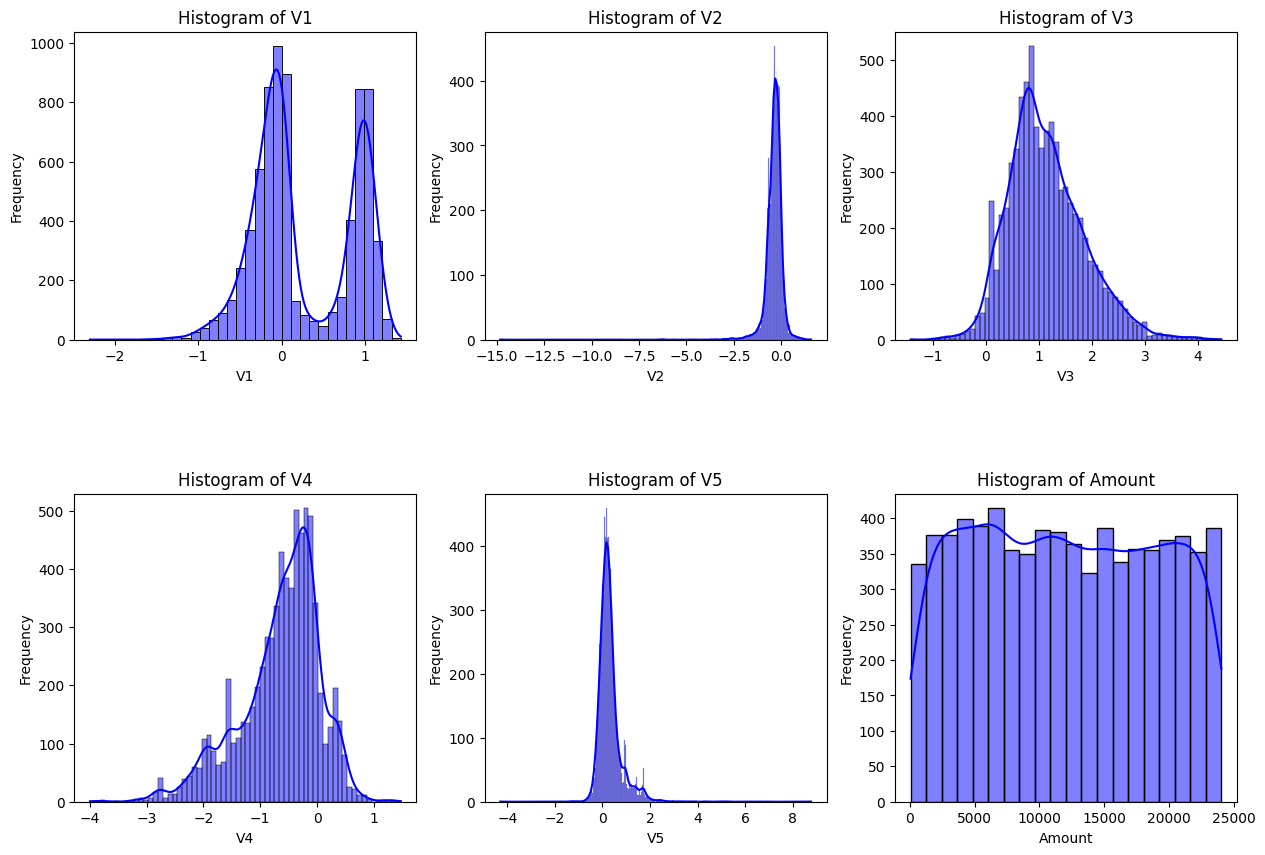

In [31]:
# Define the columns you want to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

**Distribution of Fraudulent Transactions in Dataset**

<ipython-input-70-b9efb8718125>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=cc_data, palette='Set1')


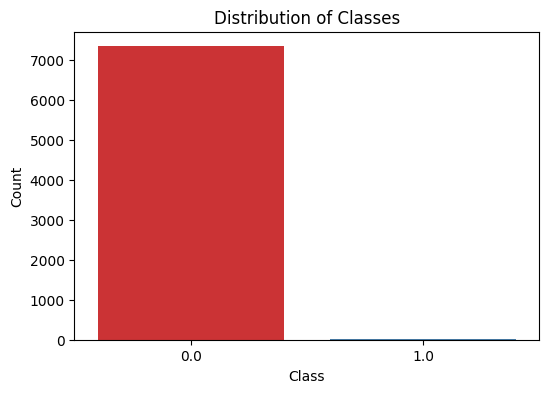

Count of Fraudulent Transactions: 25
Count of Non-Fraudulent Transactions: 7338


In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=cc_data, palette='Set1')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

fraud_count = (cc_data['Class']==1).sum()
nonfraud_count = (cc_data['Class']==0).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)

**Significant Variables Revised**

We see that with fewer independent variables in the binary logistic regression model, V5 is now a statistically significant variable, as evidenced by its Z-score magnitude greater than 2. Additionally, V1 through V4 also continue to exhibit statistically significant Z-scores.

However, Amount remains a statistically insignificant variable for predicting fraudulent transactions, as its Z-score does not exceed the threshold of 2.

Negative Coefficients (V1, V3, V5):

When a coefficient is negative, it indicates an inverse relationship between the corresponding independent variable and the log-odds of the outcome.

Which means that as the values of V1, V3, and V5 increases, the log-odds of a transaction being fraudulent (Class = 1) decrease. In other words, higher values of V1, V3, and V5 are associated with a lower likelihood of a fraudulent transaction.

Positive Coefficients (V2, V4):

Positive coefficients indicate a direct relationship between the independent variable and the log-odds of the outcome.

Which means that as the values of V2 and V4 increases, the log-odds of a transaction being fraudulent (Class = 1) increase. Higher values of V2 and V4 are associated with a higher likelihood of a fraudulent transaction.

In [33]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
logit_eq = 'Class~V1+V2+V3+V4+V5'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 7363
Model:                            GLM   Df Residuals:                     7357
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.845
Date:                Tue, 30 Jul 2024   Deviance:                       43.691
Time:                        14:05:16   Pearson chi2:                 1.63e+04
No. Iterations:                    13   Pseudo R-squ. (CS):            0.03868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0043      1.050     -5.719      0.0

**Cross Validation of our Model**

Using the validation set approach, we estimate the test error of this model.



* Split the sample set into a random training set and a random validation set. Use a test size of 20%
* Store the training set in train, testing set in test



In [34]:
#split data into training and validation/test set
train, test = train_test_split(cc_data, test_size=0.2, random_state = 42)

#Fit logistic regression model with training set
fit2 = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()


* Obtain a prediction of 'default' for each individual in the test set by computing the probability of default for that individual and classifying the individual to the default category if the posterior probability is greater than or equal to 0.5 (a Bayesian classifier). Store your predictions in predicted.
* Compute the misclassification rate, which is the fraction of the observations in the validation set that are misclassified. Name this variable mis_rate and.





In [82]:
#Make predictions on the validation set with the new model
predictions = fit2.predict(test)

#Convert predicted probabilities to binary predictions: 1 if prob>0.5
encode = lambda x: 1 if x>=0.5 else 0
predicted = predictions.map(encode)

# compare the predicted values with the actual values in the test set
misclassified = (predicted != test['Class']).sum()

mis_rate = misclassified/len(test)
print("Our model has a misclassifcation rate of:", mis_rate*100, "%")

Our model has a misclassifcation rate of: 0.05431830526887561 %



**Confusion Matrix**

In [83]:
true_labels = test['Class']
cm = confusion_matrix(true_labels, predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [73]:
from sklearn.metrics import confusion_matrix

# Assuming `test` is your test dataset and `predicted` is your model's predictions

# Check lengths
print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted: {len(predicted)}")

# If lengths are not the same, identify and fix the inconsistency
if len(true_labels) != len(predicted):
    print("The lengths of true_labels and predicted do not match.")
    # Debugging: Check for possible causes
    # For example, if some rows were dropped due to NaN values
    # Make sure to use the same rows for predictions and true labels

# Calculate confusion matrix if lengths match
if len(true_labels) == len(predicted):
    cm = confusion_matrix(true_labels, predicted)
    print("Confusion matrix:")
    print(cm)
else:
    print("Unable to compute confusion matrix due to inconsistent sample sizes.")


Length of true_labels: 3681
Length of predicted: 3682
The lengths of true_labels and predicted do not match.
Unable to compute confusion matrix due to inconsistent sample sizes.


In [74]:
test_sizes = [0.1, 0.3, 0.5]
#to store the misclassification accuracy score for each model
model_rates = []
#to store the model parameters
model_params = []

#iterate through each test size
for test_size in test_sizes:

    #split data into training and validation sets
    train, test = train_test_split(cc_data, test_size=test_size, random_state = 42)

    #fit the logistic regression model on training set
    model = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

    #Store model parameters
    model_params.append(model.params)

    #Get predictions on test/validation test
    predicted_probs = model.predict(test)

    #Classifdy predictions on 0.5 threshold
    predicted = predicted_probs.map(encode)

    #Calculate misclassification rate & store rates
    misclassified = (predicted != test['Class']).sum()
    mis_rate = misclassified / len(test)
    model_rates.append(mis_rate)

#Store misclassification rates in designated variables
mis_rate_10, mis_rate_30, mis_rate_50 = model_rates

In [39]:
print(f"Misclassification Rate for 10% Test Size:", mis_rate_10*100, "%")
print(f"Misclassification Rate for 30% Test Size:", mis_rate_30*100, "%")
print(f"Misclassification Rate for 50% Test Size:", mis_rate_50*100, "%")

Misclassification Rate for 10% Test Size: 0.13568521031207598 %
Misclassification Rate for 30% Test Size: 0.13574660633484162 %
Misclassification Rate for 50% Test Size: 0.08147745790331341 %


**K-Fold Cross Validation, K=10**

Using KFold cross validation with 10 folds across 10 trials to further test our model, we calculate the average misclassification rate.

* Name this mis_rate_kfold.

The average misclassification rate of 0.0662 suggests that, on average, the model is making correct predictions for approximately 93.38% of the data points, which is a reasonable level of performance.

In [46]:
#Store all miclassification rates
misclass_rates = []

model = LogisticRegression() #Define ML Model

for trial in range(10):
    #Define cross-value method
    cv_method = KFold(n_splits = 10, shuffle=True, random_state = trial)

    #perform cv and get accuracy scores for each fold
    scores = cross_val_score(model, cc_data[['V1','V2','V3','V4','V5']], cc_data['Class'], cv=cv_method, scoring ='accuracy')

    #calculate misclassification rate for each fold
    misclass_rate = 1 - scores
    misclass_rates.extend(misclass_rate)

mis_rate_kfold =sum(misclass_rates) / len(misclass_rates)
print(mis_rate_kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_

nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1208, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-package

*   Explore advanced techniques such as ensemble methods (e.g., Bagging and Random Forest) for improved fraud detection and hyperparameter tuning.



In [48]:
#Get get original dataset
cc_data = credit_original_data.copy()
cc_data = cc_data.drop(columns = ['id', 'Amount'])

cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0.0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0.0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0.0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.0


In [49]:
# Calculate pairwise correlations
corr_matrix = cc_data.corr()
# Find the correlation of 'HD' with all predictor variables
corr_HD = corr_matrix['Class']

# Find the predictor with the highest positive correlation
highest_corr = corr_HD.drop('Class').idxmax()

print(f"The feature that has the highest correlation with Credit Card Fraud is: {highest_corr}")

The feature that has the highest correlation with Credit Card Fraud is: V11


**Splitting Training & Test Data**

In [50]:
X = cc_data.drop('Class', axis=1) # All predictor variables
y = cc_data['Class'] # Target Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Bootstrap Aggregation (Bagging)**



* Using all predictor variables (V1-V28), train a base model to predict Credit Card Fraud




In [51]:
# Create Bagging Classifier
bag = BaggingClassifier(random_state=42)

# Train Bagging Classifier
bag.fit(X_train,y_train)

BaggingClassifier(random_state=42)

In [77]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Identify and remove samples with NaN values in y_test
nan_indices = np.isnan(y_test)
print("Indices with NaN values in y_test:", np.where(nan_indices))

# Remove samples with NaN values from y_test and y_pred
y_test_clean = y_test[~nan_indices]
y_pred_clean = y_pred[~nan_indices]

# Ensure that y_pred_clean is also aligned with y_test_clean
print(f"Length of cleaned y_test: {len(y_test_clean)}")
print(f"Length of cleaned y_pred: {len(y_pred_clean)}")

# Calculate Precision, Recall, and Accuracy Scores
bag_precision = precision_score(y_test_clean, y_pred_clean)
bag_recall = recall_score(y_test_clean, y_pred_clean)
bag_accuracy = accuracy_score(y_test_clean, y_pred_clean)

print(f"Precision: {bag_precision:.2f}")
print(f"Recall: {bag_recall:.2f}")
print(f"Accuracy: {bag_accuracy:.2f}")


Indices with NaN values in y_test: (array([1249]),)
Length of cleaned y_test: 1472
Length of cleaned y_pred: 1472
Precision: 1.00
Recall: 1.00
Accuracy: 1.00


In [79]:
bag_misclass_rate = (1 - bag_accuracy)*100
print(f"Bagging misclassification rate: {bag_misclass_rate:.2f}%")

Bagging misclassification rate: 0.00%


**Random Forest**

* Using all predictor variables (V1-V28), train a base model to predict Credit Card Fraud



In [56]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

#Train rf classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Assuming rf is already trained and X_test, y_test are defined

# Identify and remove samples with NaN in y_test
nan_indices = np.isnan(y_test)
print("Indices with NaN values in y_test:", np.where(nan_indices))

# Remove samples with NaN values in y_test
X_test_clean = X_test[~nan_indices]
y_test_clean = y_test[~nan_indices]

# Ensure that y_pred_rf and evaluations use the cleaned data
y_pred_rf = rf.predict(X_test_clean)

# Calculate precision, recall, etc., using the cleaned y_test
rf_precision = precision_score(y_test_clean, y_pred_rf)
rf_recall = recall_score(y_test_clean, y_pred_rf)
rf_accuracy = accuracy_score(y_test_clean, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")


Indices with NaN values in y_test: (array([1249]),)
Random Forest Accuracy: 1.00
Precision: 1.0
Recall: 0.8571428571428571


In [81]:
from sklearn.metrics import accuracy_score

# Assuming y_test_clean and y_pred_rf are defined as above

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_clean, y_pred_rf)

# Calculate misclassification rate
rf_misclass_rate = (1 - rf_accuracy) * 100
print(f"Random Forest misclassification rate: {rf_misclass_rate:.2f}%")


Random Forest misclassification rate: 0.07%


In [64]:
# Access the feature importances
feature_importances = rf.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Print all features and their importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")

Feature V1: Importance = 0.0089
Feature V2: Importance = 0.0075
Feature V3: Importance = 0.0897
Feature V4: Importance = 0.0422
Feature V5: Importance = 0.0019
Feature V6: Importance = 0.0074
Feature V7: Importance = 0.0097
Feature V8: Importance = 0.0079
Feature V9: Importance = 0.0296
Feature V10: Importance = 0.1074
Feature V11: Importance = 0.1501
Feature V12: Importance = 0.2053
Feature V13: Importance = 0.0079
Feature V14: Importance = 0.1400
Feature V15: Importance = 0.0123
Feature V16: Importance = 0.0116
Feature V17: Importance = 0.0717
Feature V18: Importance = 0.0179
Feature V19: Importance = 0.0010
Feature V20: Importance = 0.0127
Feature V21: Importance = 0.0091
Feature V22: Importance = 0.0030
Feature V23: Importance = 0.0103
Feature V24: Importance = 0.0017
Feature V25: Importance = 0.0131
Feature V26: Importance = 0.0072
Feature V27: Importance = 0.0078
Feature V28: Importance = 0.0050
